## Modeling The Data ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('./data/EDA.csv')

In [3]:
df.head()
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [5]:
train,test = train_test_split(df)
print(len(train), len(test))
train.head()

13236 4412


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,month_sold_11,month_sold_12,month_sold_2,month_sold_3,month_sold_4,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9
2596,632500.0,5,3.25,3500,7254,2.0,0.0,3,8,2760,...,0,0,0,0,0,0,0,0,0,1
778,765000.0,4,2.75,2790,10819,2.0,0.0,3,10,2790,...,0,0,0,0,0,1,0,0,0,0
15708,610000.0,4,2.25,2200,7200,1.0,2.0,4,8,1220,...,0,0,0,0,0,0,0,0,0,0
14882,705000.0,4,2.75,2780,6207,2.0,0.0,3,8,2780,...,0,0,0,0,0,0,0,0,1,0
652,431000.0,3,1.00,1810,7200,1.0,0.0,4,7,1130,...,0,0,1,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'Geo_Clusters_1', 'Geo_Clusters_2',
       'Geo_Clusters_3', 'Geo_Clusters_4', 'Geo_Clusters_5', 'Geo_Clusters_6',
       'year_renovated_11', 'year_renovated_12', 'year_renovated_3',
       'year_renovated_4', 'year_renovated_5', 'year_renovated_6',
       'year_renovated_7', 'year_renovated_8', 'year_renovated_9',
       'waterfront_1', 'year_built_1', 'year_built_10', 'year_built_11',
       'year_built_2', 'year_built_3', 'year_built_4', 'year_built_5',
       'year_built_6', 'year_built_7', 'year_built_8', 'year_built_9',
       'year_built_nan', 'month_sold_10', 'month_sold_11', 'month_sold_12',
       'month_sold_2', 'month_sold_3', 'month_sold_4', 'month_sold_5',
       'month_sold_6', 'month_sold_7', 'month_sold_8', 'month_sold_9'],
      dtype='object')

In [7]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     611.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:14:24   Log-Likelihood:            -1.7556e+05
No. Observations:               13236   AIC:                         3.512e+05
Df Residuals:                   13184   BIC:                         3.516e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.267e+05   2.14e+04    -19.963      0.000   -4.69e+05   -3.85e+05
bedrooms          -1.611e+04   2035.023     -7.916      0.000   -2.01e+04   -1.21e+04
bathrooms          2.449e+04   3129.036      7.827      0.000    1.84e+04    3.06e+04
sqft_living          81.3294     18.637      4.364      0.000      44.798     117.861
sqft_lot             -2.1925      0.889     -2.467      0.014      -3.935      -0.451
floors             3021.5154   3864.153      0.782      0.434   -4552.780    1.06e+04
view               5.205e+04   2156.547     24.137      0.000    4.78e+04    5.63e+04
condition          3.419e+04   2153.481     15.879      0.000       3e+04    3.84e+04
grade              9.753e+04   2051.328     47.546      0.000    9.35e+04    1.02e+05
sqft_above           29.6904     18.579      1.598      0.110      -6.727      66.108
sqft_basement        21.2308     18.391      1.154      0.248     -14.819      57.280
sqft_living15        42.7119      3.619     11.801      0.000      35.617      49.807
sqft_lot15           -1.4824      0.894     -1.658      0.097      -3.235       0.270
Geo_Clusters_1     1.035e+05   4953.688     20.886      0.000    9.38e+04    1.13e+05
Geo_Clusters_2     9.752e+04   3712.876     26.265      0.000    9.02e+04    1.05e+05
Geo_Clusters_3      -1.3e+05   5108.597    -25.455      0.000    -1.4e+05    -1.2e+05
Geo_Clusters_4     1.173e+04   6540.150      1.794      0.073   -1086.761    2.46e+04
Geo_Clusters_5    -1.025e+05   6144.147    -16.676      0.000   -1.15e+05   -9.04e+04
Geo_Clusters_6     3059.7387   4905.507      0.624      0.533   -6555.762    1.27e+04
year_renovated_11 -3.713e+04   2.01e+04     -1.846      0.065   -7.66e+04    2301.430
year_renovated_12  -1.13e+05   1.31e+04     -8.611      0.000   -1.39e+05   -8.73e+04
year_renovated_3  -2.283e+05   9.99e+04     -2.284      0.022   -4.24e+05   -3.24e+04
year_renovated_4  -1.401e+05   7.13e+04     -1.965      0.049    -2.8e+05    -343.372
year_renovated_5  -1.972e+05   4.63e+04     -4.257      0.000   -2.88e+05   -1.06e+05
year_renovated_6  -2.101e+05   3.32e+04     -6.325      0.000   -2.75e+05   -1.45e+05
year_renovated_7  -1.056e+05   3.13e+04     -3.371      0.001   -1.67e+05   -4.42e+04
year_renovated_8  -1.411e+05   2.15e+04     -6.559      0.000   -1.83e+05   -9.89e+04
year_renovated_9   -6.58e+04   2.09e+04     -3.144      0.002   -1.07e+05   -2.48e+04
waterfront_1       4.429e+05   2.73e+04     16.202      0.000    3.89e+05    4.96e+05
year_built_1       4567.4667   8902.434      0.513      0.608   -1.29e+04     2.2e+04
year_built_10     -1.929e+05   8242.707    -23.406      0.000   -2.09e+05   -1.77e+05
year_built_11     -1.606e+05   9366.125    -17.147      0.000   -1.79e+05   -1.42e+05
year_built_2      -1.953e+04   8082.558     -2.416      0.016   -3.54e+04

In [8]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

52 34
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-4.267e+05,2.14e+04,-19.963,0.000,-4.69e+05,-3.85e+05
bedrooms,-1.611e+04,2035.023,-7.916,0.000,-2.01e+04,-1.21e+04
bathrooms,2.449e+04,3129.036,7.827,0.000,1.84e+04,3.06e+04
sqft_living,81.3294,18.637,4.364,0.000,44.798,117.861
sqft_lot,-2.1925,0.889,-2.467,0.014,-3.935,-0.451


In [9]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     915.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:14:24   Log-Likelihood:            -1.7558e+05
No. Observations:               13236   AIC:                         3.512e+05
Df Residuals:                   13201   BIC:                         3.515e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.389e+05   1.79e+04    -24.543      0.000   -4.74e+05   -4.04e+05
bedrooms          -1.589e+04   2028.365     -7.836      0.000   -1.99e+04   -1.19e+04
bathrooms          2.389e+04   3058.035      7.811      0.000    1.79e+04    2.99e+04
sqft_living         107.6533      3.650     29.496      0.000     100.499     114.807
sqft_lot             -3.1475      0.562     -5.599      0.000      -4.249      -2.046
view               5.111e+04   2120.299     24.106      0.000     4.7e+04    5.53e+04
condition          3.404e+04   2128.972     15.987      0.000    2.99e+04    3.82e+04
grade              9.833e+04   2006.957     48.996      0.000    9.44e+04    1.02e+05
sqft_living15        44.2171      3.459     12.783      0.000      37.437      50.997
Geo_Clusters_1     1.002e+05   3904.307     25.661      0.000    9.25e+04    1.08e+05
Geo_Clusters_2     9.517e+04   3211.760     29.631      0.000    8.89e+04    1.01e+05
Geo_Clusters_3     -1.33e+05   4263.985    -31.194      0.000   -1.41e+05   -1.25e+05
Geo_Clusters_5     -1.06e+05   5321.319    -19.912      0.000   -1.16e+05   -9.55e+04
year_renovated_12 -9.895e+04   1.03e+04     -9.599      0.000   -1.19e+05   -7.87e+04
year_renovated_3  -2.194e+05   9.95e+04     -2.206      0.027   -4.14e+05   -2.44e+04
year_renovated_4  -1.264e+05   7.08e+04     -1.786      0.074   -2.65e+05    1.23e+04
year_renovated_5    -1.8e+05   4.55e+04     -3.952      0.000   -2.69e+05   -9.07e+04
year_renovated_6  -1.969e+05   3.22e+04     -6.114      0.000    -2.6e+05   -1.34e+05
year_renovated_7  -8.981e+04   3.03e+04     -2.967      0.003   -1.49e+05   -3.05e+04
year_renovated_8  -1.249e+05   1.99e+04     -6.269      0.000   -1.64e+05   -8.59e+04
year_renovated_9   -4.97e+04   1.93e+04     -2.573      0.010   -8.76e+04   -1.18e+04
waterfront_1       4.407e+05   2.72e+04     16.193      0.000    3.87e+05    4.94e+05
year_built_10     -1.906e+05   6461.541    -29.504      0.000   -2.03e+05   -1.78e+05
year_built_11     -1.588e+05   7881.342    -20.151      0.000   -1.74e+05   -1.43e+05
year_built_2      -2.433e+04   6573.022     -3.702      0.000   -3.72e+04   -1.14e+04
year_built_3      -4.458e+04   8707.316     -5.120      0.000   -6.16e+04   -2.75e+04
year_built_4      -7.105e+04   6052.199    -11.740      0.000   -8.29e+04   -5.92e+04
year_built_5      -1.012e+05   5907.872    -17.124      0.000   -1.13e+05   -8.96e+04
year_built_6      -1.393e+05   6180.490    -22.536      0.000   -1.51e+05   -1.27e+05
year_built_7      -1.742e+05   6494.289    -26.823      0.000   -1.87e+05   -1.61e+05
year_built_8      -1.735e+05   6810.262    -25.473      0.000   -1.87e+05    -1.6e+05
year_built_9      -1.837e+05   7118.676    -25.805      0.000   -1.98e+05    -1.7e+05
month_sold_2       1.863e+04   5166.538      3.607      0.000    8507.238

In [10]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     317.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:14:24   Log-Likelihood:                -58421.
No. Observations:                4412   AIC:                         1.169e+05
Df Residuals:                    4377   BIC:                         1.171e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.646e+05   2.96e+04    -15.699      0.000   -5.23e+05   -4.07e+05
bedrooms          -1.268e+04   3342.445     -3.794      0.000   -1.92e+04   -6126.930
bathrooms          3.221e+04   5328.213      6.045      0.000    2.18e+04    4.27e+04
sqft_living         105.9459      6.312     16.785      0.000      93.571     118.320
sqft_lot             -4.5333      0.957     -4.739      0.000      -6.409      -2.658
view               3.899e+04   3534.490     11.032      0.000    3.21e+04    4.59e+04
condition          3.286e+04   3544.338      9.271      0.000    2.59e+04    3.98e+04
grade              9.149e+04   3449.542     26.523      0.000    8.47e+04    9.83e+04
sqft_living15        46.8671      5.963      7.860      0.000      35.177      58.557
Geo_Clusters_1      1.11e+05   6653.014     16.689      0.000     9.8e+04    1.24e+05
Geo_Clusters_2     1.101e+05   5408.696     20.356      0.000    9.95e+04    1.21e+05
Geo_Clusters_3    -1.253e+05   7373.665    -16.992      0.000    -1.4e+05   -1.11e+05
Geo_Clusters_5    -9.947e+04   8926.153    -11.143      0.000   -1.17e+05    -8.2e+04
year_renovated_12 -5.024e+04   1.62e+04     -3.104      0.002    -8.2e+04   -1.85e+04
year_renovated_3  -1.276e+04   1.38e+05     -0.092      0.926   -2.83e+05    2.58e+05
year_renovated_4  -1.219e+05    8.1e+04     -1.506      0.132   -2.81e+05    3.68e+04
year_renovated_5  -7.163e+04   8.09e+04     -0.886      0.376    -2.3e+05    8.69e+04
year_renovated_6  -6.795e+04    5.1e+04     -1.332      0.183   -1.68e+05    3.21e+04
year_renovated_7  -1.806e+05   5.43e+04     -3.326      0.001   -2.87e+05   -7.41e+04
year_renovated_8  -4.822e+04   3.38e+04     -1.428      0.153   -1.14e+05     1.8e+04
year_renovated_9   5.546e+04   2.88e+04      1.927      0.054    -968.092    1.12e+05
waterfront_1       4.867e+05    3.9e+04     12.477      0.000     4.1e+05    5.63e+05
year_built_10     -1.861e+05    1.1e+04    -16.996      0.000   -2.08e+05   -1.65e+05
year_built_11     -1.437e+05   1.34e+04    -10.731      0.000    -1.7e+05   -1.17e+05
year_built_2      -6638.0052    1.1e+04     -0.606      0.545   -2.81e+04    1.48e+04
year_built_3      -2.474e+04    1.4e+04     -1.770      0.077   -5.21e+04    2666.272
year_built_4      -6.909e+04   1.03e+04     -6.733      0.000   -8.92e+04    -4.9e+04
year_built_5       -9.01e+04   1.01e+04     -8.953      0.000    -1.1e+05   -7.04e+04
year_built_6      -1.349e+05   1.04e+04    -12.917      0.000   -1.55e+05   -1.14e+05
year_built_7      -1.737e+05    1.1e+04    -15.825      0.000   -1.95e+05   -1.52e+05
year_built_8      -1.688e+05   1.15e+04    -14.674      0.000   -1.91e+05   -1.46e+05
year_built_9      -1.785e+05   1.21e+04    -14.751      0.000   -2.02e+05   -1.55e+05
month_sold_2      -5331.3033   8927.939     -0.597      0.550   -2.28e+04

In [11]:
y = df[['price']]
X = df[x_cols]

In [12]:
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model_test = linreg.fit(X_train, y_train)

y_hat_train = model_test.predict(X_train)
y_hat_test = model_test.predict(X_test)

In [39]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [40]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

R_squared = model_test.score(X_test, y_test)
print('This iteration has an R-squared value of:', R_squared)

Train Mean Squarred Error: 18785758982.560406
Test Mean Squarred Error: 21498734513.835747
This iteration has an R-squared value of: 0.6950103768045549


(array([3.000e+00, 4.000e+00, 1.300e+01, 5.600e+01, 1.250e+02, 4.160e+02,
        4.344e+03, 8.155e+03, 9.780e+02, 2.400e+01]),
 array([-1413621.29203041, -1216182.72170793, -1018744.15138545,
         -821305.58106298,  -623867.0107405 ,  -426428.44041802,
         -228989.87009554,   -31551.29977306,   165887.27054942,
          363325.8408719 ,   560764.41119437]),
 <a list of 10 Patch objects>)

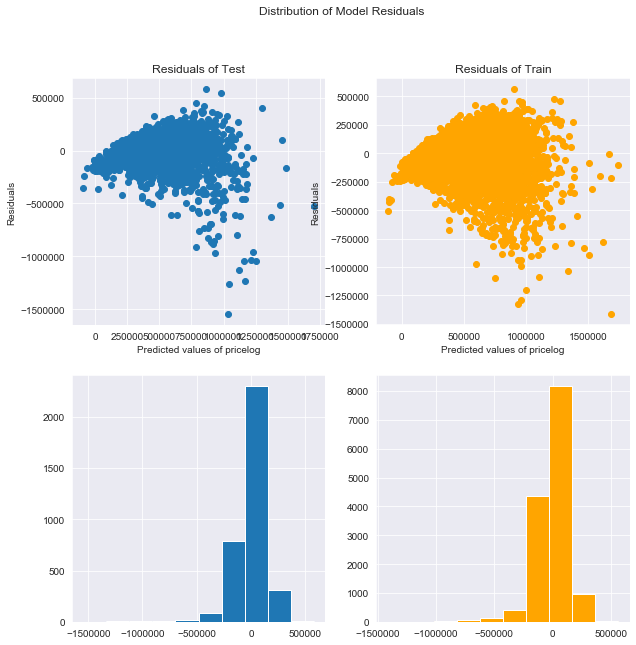

In [41]:
#Residuals check
#Define residuals as predicted less observed
residuals_train = y_hat_train - y_train
residuals_test = y_hat_test - y_test

fig = plt.figure(figsize=(10,10))
fig.suptitle("Distribution of Model Residuals")

ax1 = fig.add_subplot(2,2,1) #Scatterplot of test residuals
ax1.scatter(x=y_hat_test, y=residuals_test)
ax1.set_title('Residuals of Test')
ax1.set_xlabel('Predicted values of pricelog')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(2,2,2) #Scatterplot of train residuals
ax2.scatter(x=y_hat_train, y=residuals_train, c='orange')
ax2.set_title('Residuals of Train')
ax2.set_xlabel('Predicted values of pricelog')
ax2.set_ylabel('Residuals')

ax3 = fig.add_subplot(2,2,3) #Histogram of test residuals
ax3.hist(residuals_test) 

ax4 = fig.add_subplot(2,2,4) #Histogram of train residuals
ax4.hist(residuals_train, color='orange')